In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.tsa.ar_model import AutoReg as AR
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [14]:
df = pd.read_csv('daily_covid_cases.csv',parse_dates=['Date'],index_col='Date')
df['hour'] = df.groupby(level=0).cumcount()
df.index = pd.to_datetime(df.index)+ pd.to_timedelta(df['hour'],unit = 'h')
df.drop('hour',axis=1,inplace=True)
df.index.freq = df.index.inferred_freq
df

,new_cases
2020-01-30,0.00000
2020-01-31,0.00000
2020-02-01,0.33333
2020-02-02,0.50000
2020-02-03,0.60000
...,...
2021-09-28,26421.85714
2021-09-29,25222.71429
2021-09-30,24557.71429
2021-10-01,23806.00000


Text(0, 0.5, 'No. of Cases')

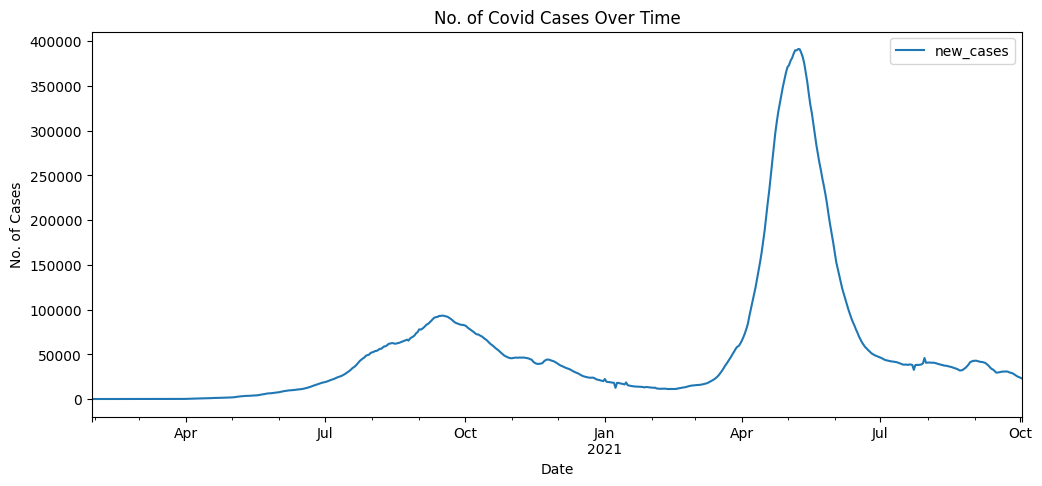

In [21]:
# Create a line plot with the x-axis as index of the day and y-axis as the number of
# Covid-19 cases, as shown in Figure 1. Observe the first wave (around August-2020)
# and second wave (May-2021) of COVID-19 in India.

df.plot(figsize=(12,5))
plt.title('No. of Covid Cases Over Time')
plt.xlabel('Date')
plt.ylabel('No. of Cases')

#### Function to add Lag 

In [23]:
def add_lag_features(df, k, feature_cols):
    new_df = df.copy()
    if(k>0):
        for col in feature_cols:
            new_df[f'Lag_{k}'] = new_df[col].shift(k)
        
        new_df.dropna(subset=[f'Lag_{k}'],inplace=True)
    else:
        print(f'Please enter valid k(lag) value!')
        return
    return new_df

In [26]:
# Generate another time sequence with one day lag to the given time sequence. Find
# the Pearson correlation (autocorrelation) coefficient between the generated one-day lag
# time sequence and the given time sequence.

df_lag1 = add_lag_features(df,1,['new_cases'])
autocorr_lag1 = df_lag1['new_cases'].corr(df_lag1['Lag_1'])

print(f'Pearson Correlation (AutoCorrelation) with lag1 Series : {autocorr_lag1:.4f}')

Pearson Correlation (AutoCorrelation) with lag1 Series : 0.9991


Text(0, 0.5, 'Lag_1 Data')

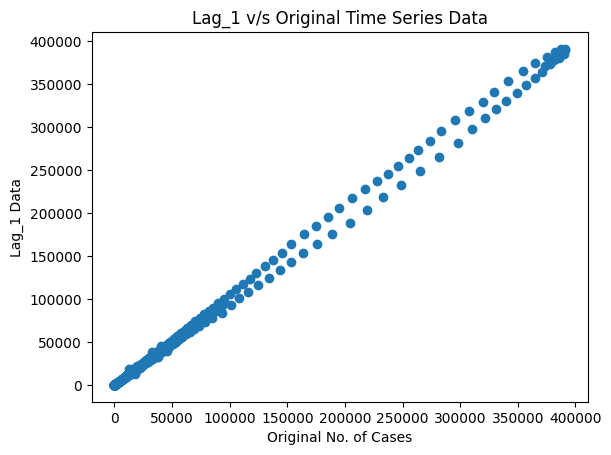

In [28]:
# Generate a scatter plot between given time sequence and one day lagged generated
# sequence. Observations ?

plt.scatter(df_lag1['new_cases'], df_lag1['Lag_1'])
plt.title("Lag_1 v/s Original Time Series Data")
plt.xlabel("Original No. of Cases")
plt.ylabel("Lag_1 Data")

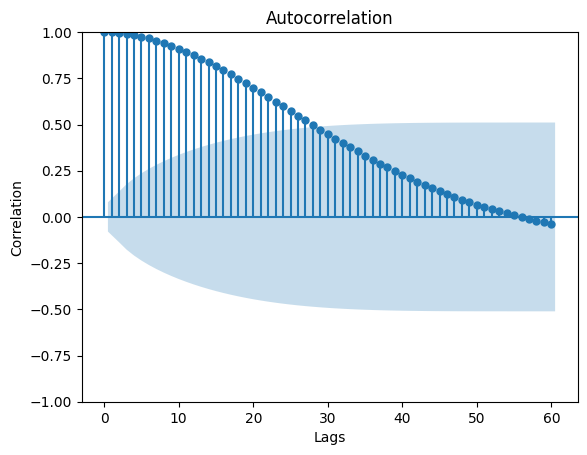

In [29]:
# Plot a correlogram or Auto Correlation Function using python inbuilt function plot acf
# up to 60 lag values. Observe the trend in the line plot with an increase in lagged values.

plot_acf(df_lag1['new_cases'],lags=60)
plt.ylabel('Correlation')
plt.xlabel('Lags')
plt.show()

In [31]:
# Split the data into two parts. The initial 65% of the sequence for training data and
# the remaining 35% of the sequence as test data. (You may use slicing operation for
# the same to maintain the order of the sequence. Note that, you should not shuffle
# randomly.) This test set approximately covers the second wave of COVID-19. Plot
# the train and test sets. Generate an autoregression (AR) model using AutoReg()
# function from statsmodels library. This function generates an AR model with the
# specified training data and lagged values (given as its input). Use 5 lagged values as
# its input (p=5). Train/Fit the model onto the training dataset. Obtain the coefficients
# (w0 , w1 , ..., wp ) from the trained AR model.

train_size = int(0.65*(len(df)))
train, test = df[:train_size], df[train_size:]

Text(0, 0.5, 'No. of Cases')

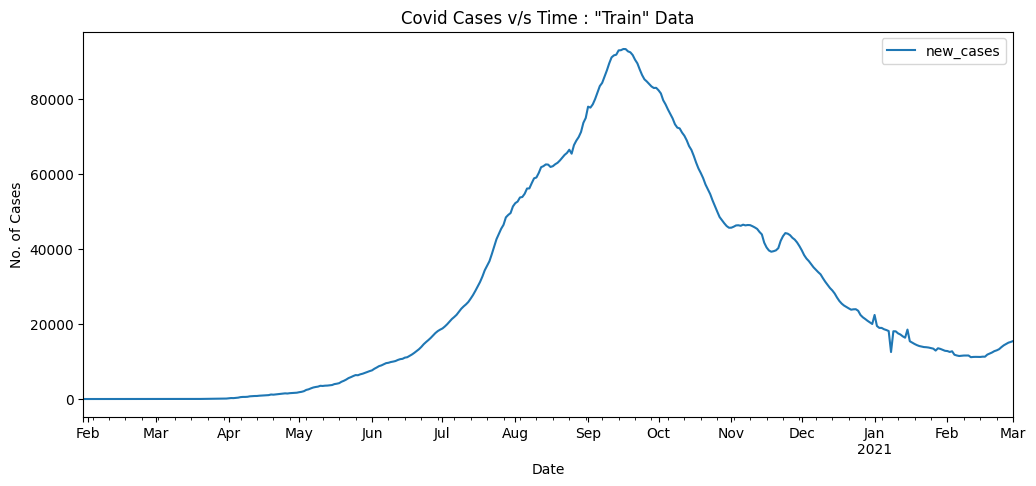

In [35]:
train.plot(figsize=(12,5))
plt.title('Covid Cases v/s Time : "Train" Data')
plt.xlabel('Date')
plt.ylabel('No. of Cases')

Text(0, 0.5, 'No. of Cases')

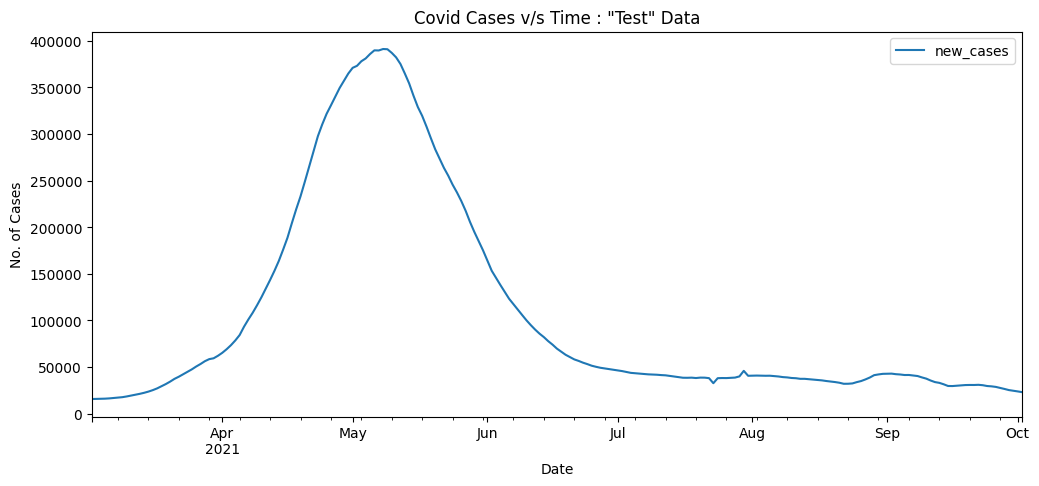

In [36]:
test.plot(figsize=(12,5))
plt.title('Covid Cases v/s Time : "Test" Data')
plt.xlabel('Date')
plt.ylabel('No. of Cases')

#### Lag 5 Data



		Scatter plot for Autoregrssion lag = 5


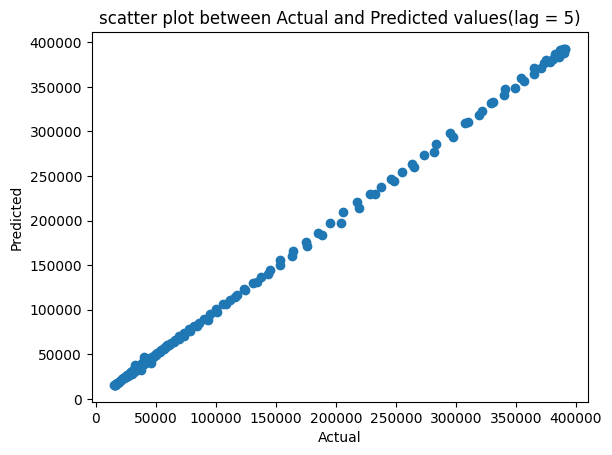

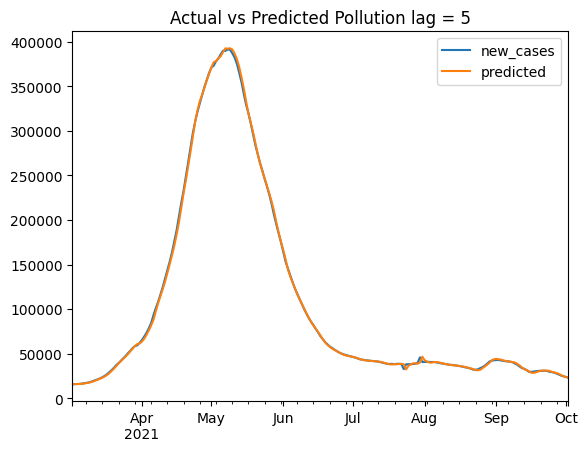



Error measure for lag 5 series:

RMSE : 1923.5898140922898
MAPE : 1.574836382405823



In [44]:
lag = 5
test = test.copy()
model = AR(train['new_cases'],lags=lag).fit()
coef_lag5 = model.params

previous_data = list(train['new_cases'].values)
predictions = []
for ex in range(len(test)):
    lag_values = previous_data[-lag:]
    lag_values.reverse()
    y_pred = coef.iloc[0] + sum(coef.iloc[i+1] * lag_values[i] for i in range(lag))
    predictions.append(y_pred)
    previous_data.append(test['new_cases'].iloc[ex])
y_test_pred = pd.Series(predictions)
test['predicted'] = predictions


print(f'\n\n\t\tScatter plot for Autoregrssion lag = 5')
plt.scatter(x=test['new_cases'],y=y_test_pred)
plt.title(f'scatter plot between Actual and Predicted values(lag = 5)')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

test.plot(y=['new_cases','predicted'],title=f"Actual vs Predicted Pollution lag = 5")
plt.show()
print()
rmse_test = math.sqrt(mean_squared_error(test['new_cases'],test['predicted']))
test_new = test[test['new_cases'] != 0]
mape_test = mean_absolute_percentage_error(test_new['new_cases'],test_new['predicted'])*100

print(f'\nError measure for lag {lag} series:\n\nRMSE : {rmse_test}\nMAPE : {mape_test}')
print()

#### AR models for lag values of 1, 5, 10, 15, 20, 25, 30,35, 40, 45, 50, 55 and 60 days.
(a) Give a line plot showing actual and predicted test values with time.  
(b) Compute the RMSE and MAPE between predicted and original test data values in
each case.

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 1


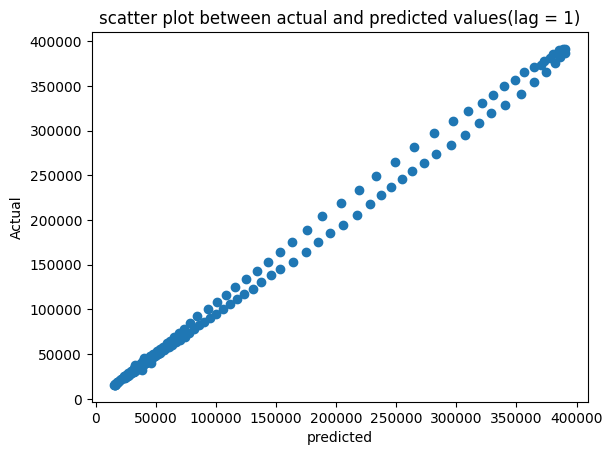

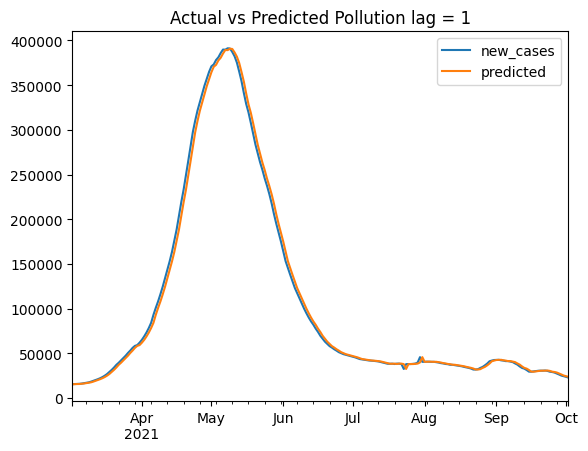


Error measure for lag 1 series:

RMSE : 5663.9234599053225
MAPE : 3.446540155208938

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 5


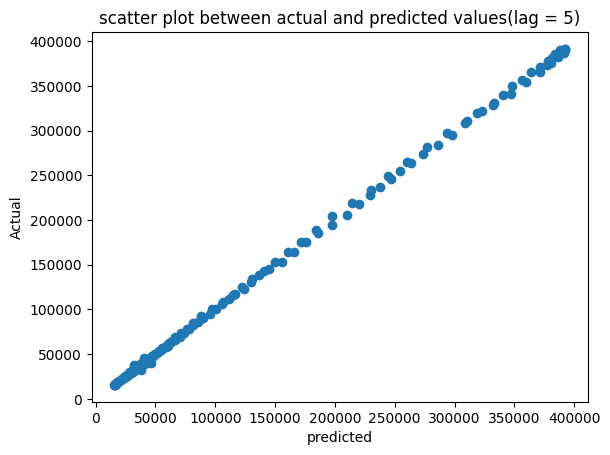

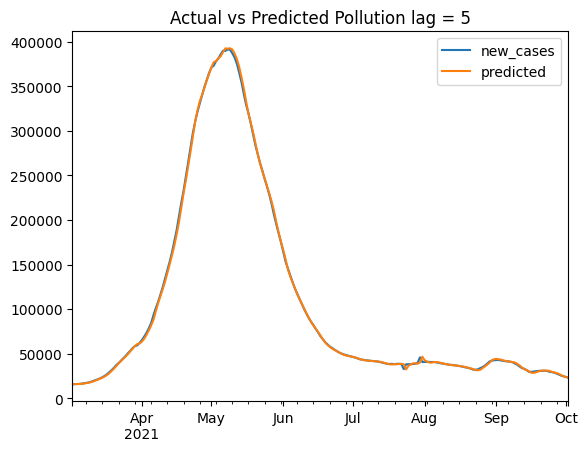


Error measure for lag 5 series:

RMSE : 1923.5898140922898
MAPE : 1.574836382405823

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 10


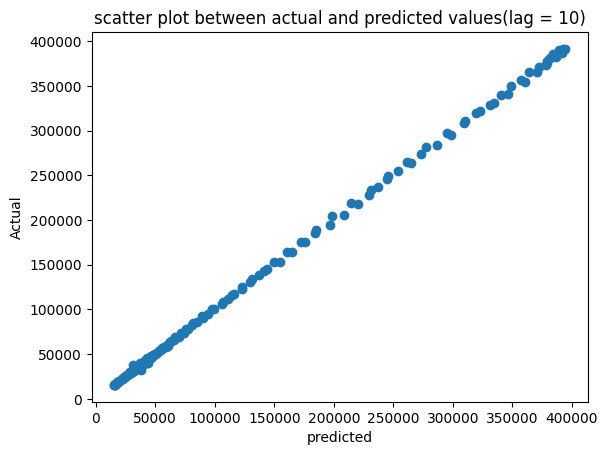

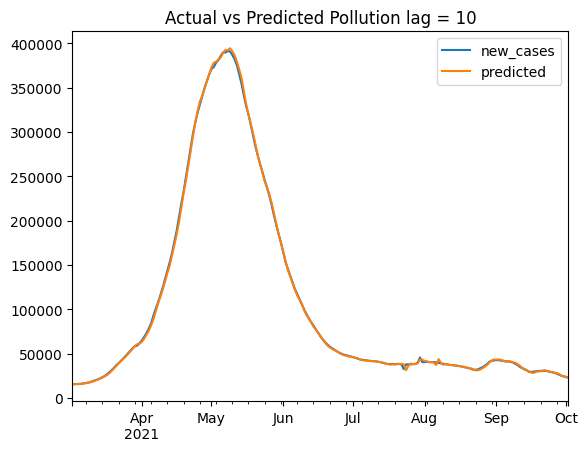


Error measure for lag 10 series:

RMSE : 1776.8128407734748
MAPE : 1.5193699431087826

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 15


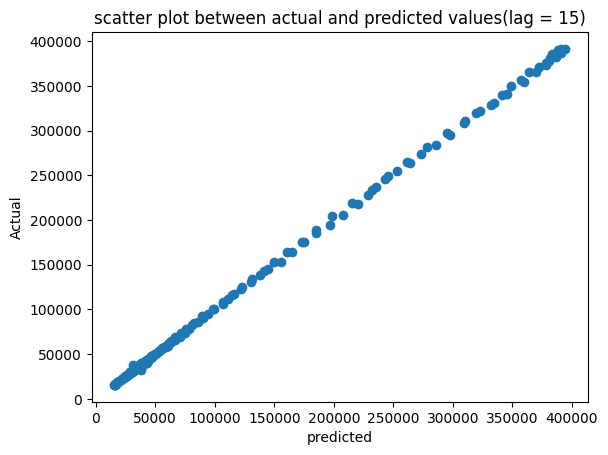

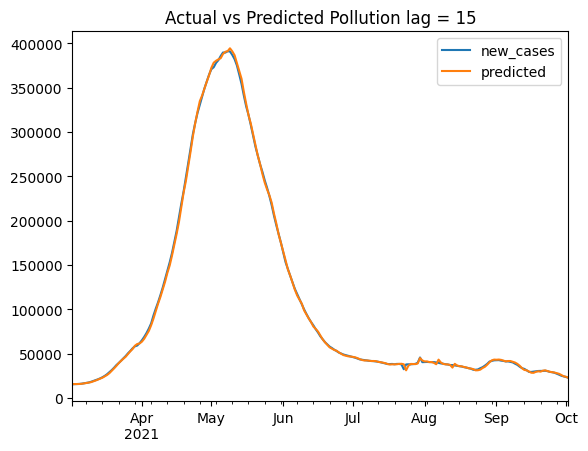


Error measure for lag 15 series:

RMSE : 1699.2300247396695
MAPE : 1.496236117874853

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 20


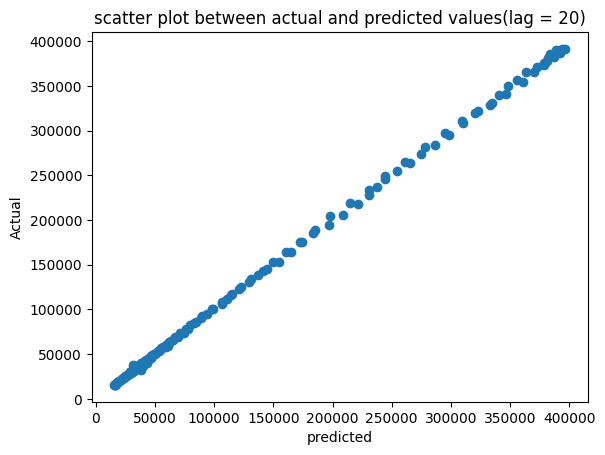

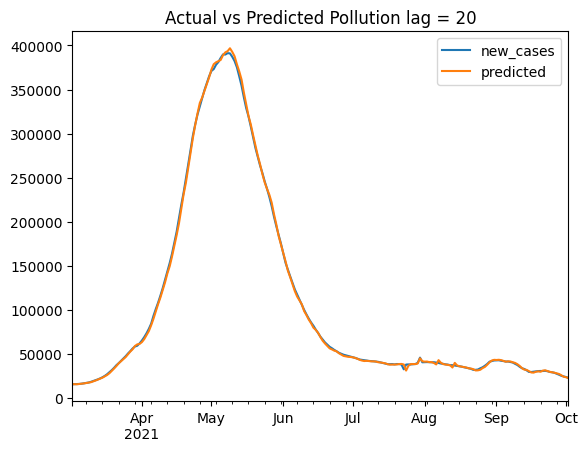


Error measure for lag 20 series:

RMSE : 1929.4623044918335
MAPE : 1.6015135751554455

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 25


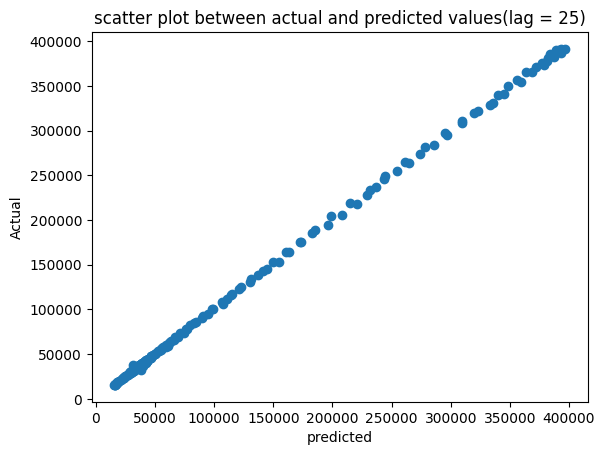

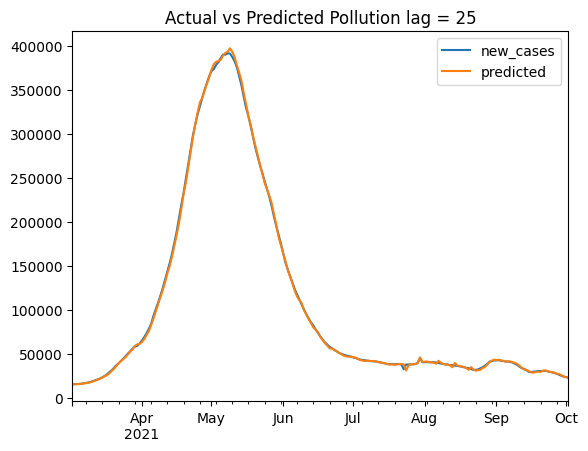


Error measure for lag 25 series:

RMSE : 1795.639507602397
MAPE : 1.5354207718256867

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 30


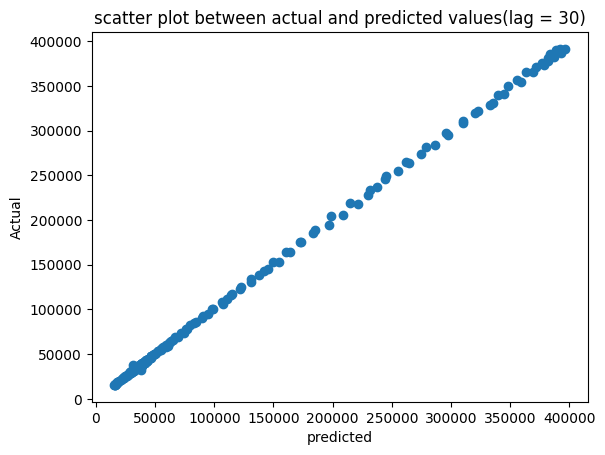

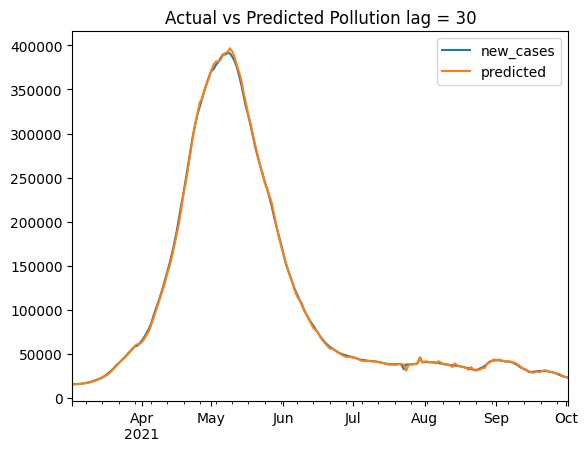


Error measure for lag 30 series:

RMSE : 1802.5927232353206
MAPE : 1.5780480737237086

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 35


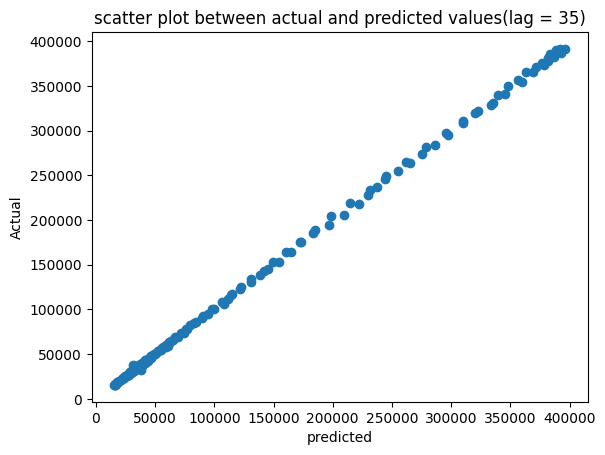

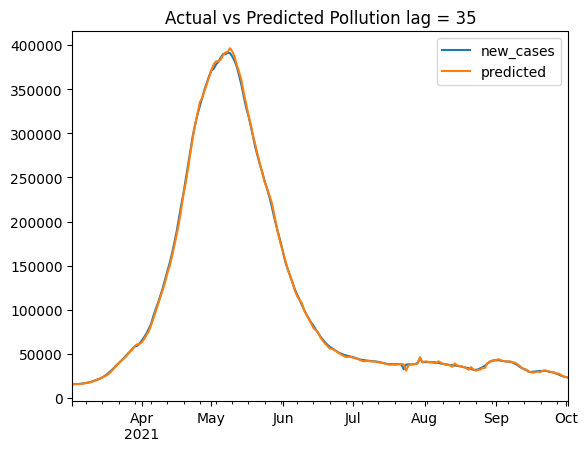


Error measure for lag 35 series:

RMSE : 1821.6897112804663
MAPE : 1.6139494897102837

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 40


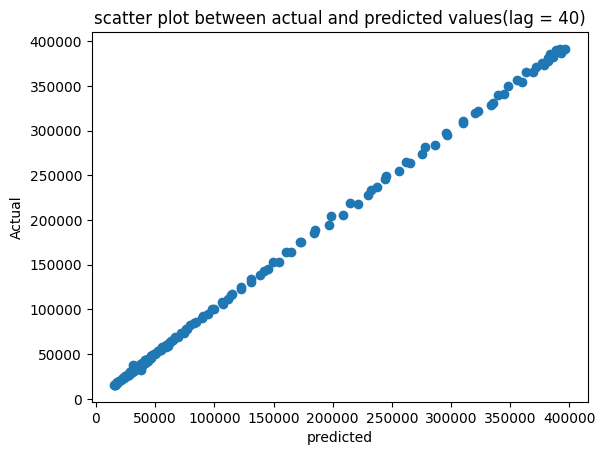

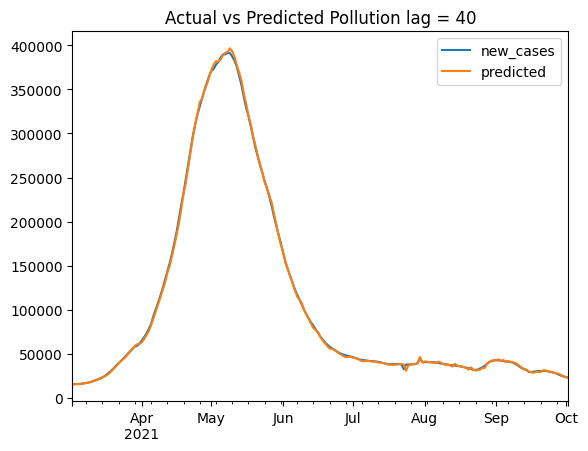


Error measure for lag 40 series:

RMSE : 1802.4621986861832
MAPE : 1.6356017800377671

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 45


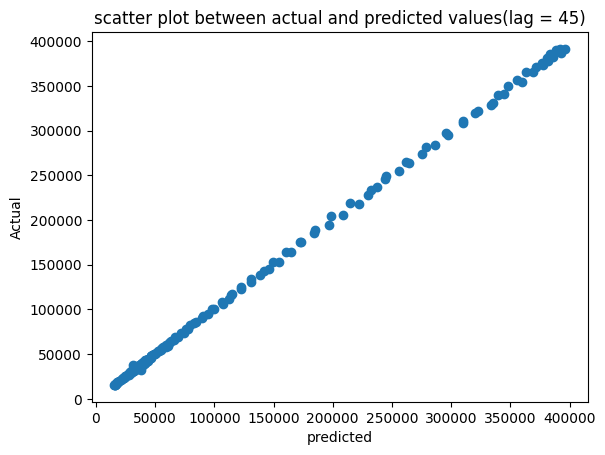

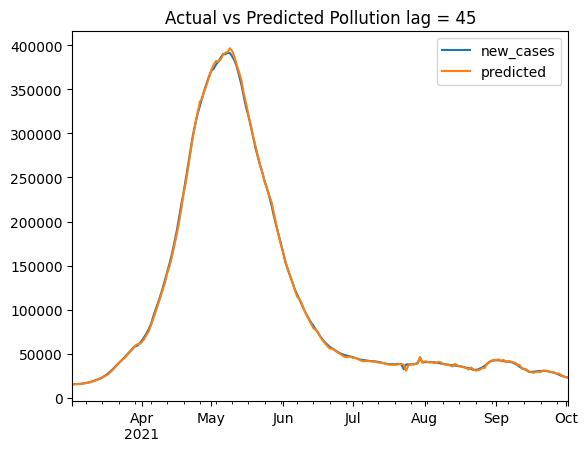


Error measure for lag 45 series:

RMSE : 1800.527434734576
MAPE : 1.6484968389222447

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 50


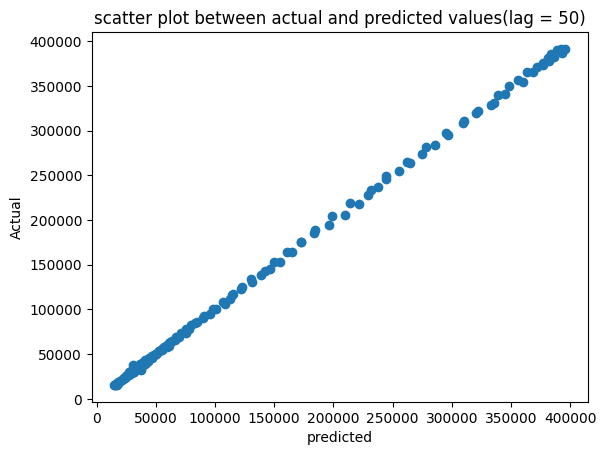

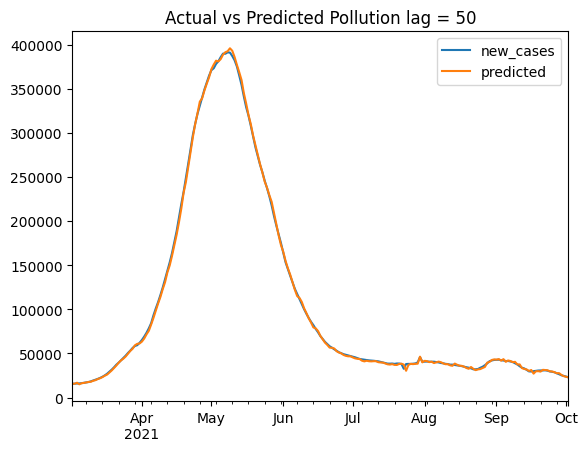


Error measure for lag 50 series:

RMSE : 1816.2581365163405
MAPE : 1.8112984810754105

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 55


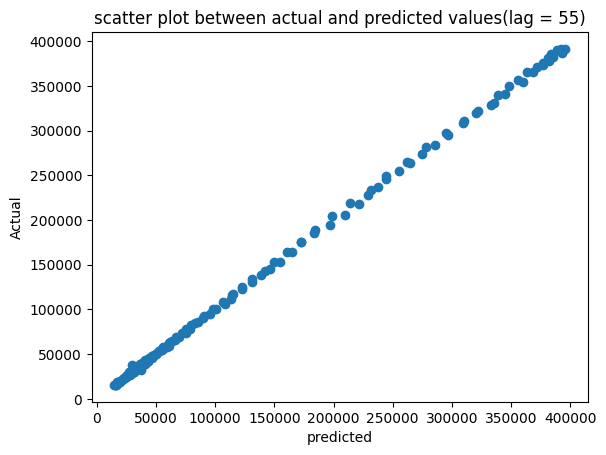

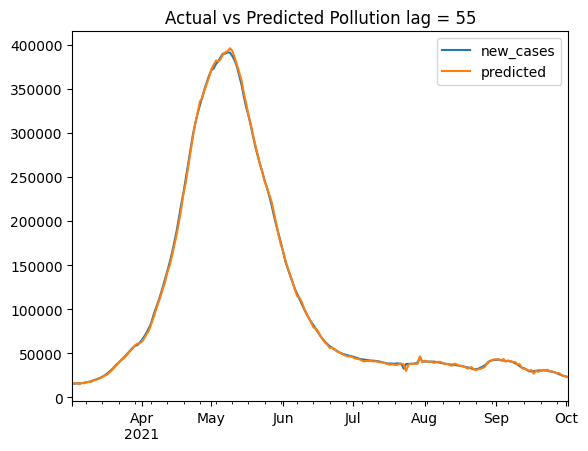


Error measure for lag 55 series:

RMSE : 1828.1203984870126
MAPE : 1.8635059348954905

****************************************************************************************************


		Scatter plot for Autoregrssion lag = 60


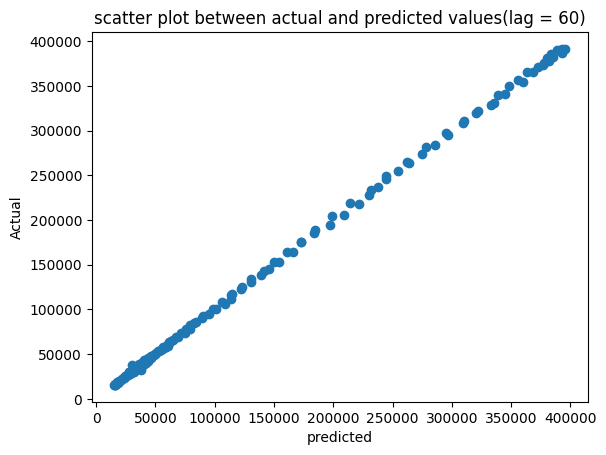

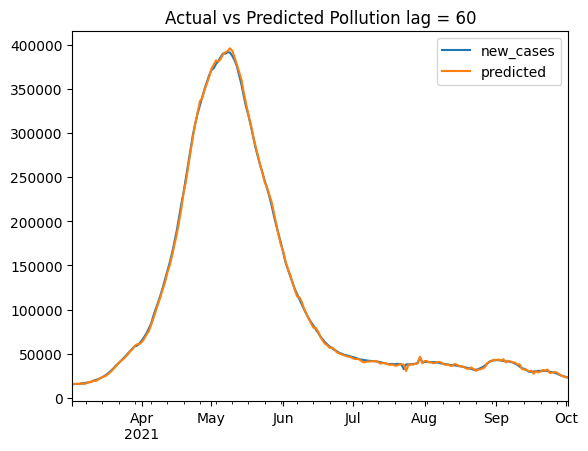


Error measure for lag 60 series:

RMSE : 1860.865711183119
MAPE : 2.021643125809627



In [46]:
lags = [1,5,10,15,20,25,30,35,40,45,50,55,60]
rmse_list = []
mape_list = []
test = test.copy()
for lag in lags:

    model = AR(train['new_cases'],lags=lag).fit()
    coef = model.params

    previous_data = list(train['new_cases'].values)
    predictions = []
    for ex in range(len(test)):
        lag_values = previous_data[-lag:]
        lag_values.reverse()
        y_pred = coef.iloc[0] + sum(coef.iloc[i+1] * lag_values[i] for i in range(lag))
        predictions.append(y_pred)
        previous_data.append(test['new_cases'].iloc[ex])
    y_test_pred = pd.Series(predictions)
    test['predicted'] = predictions

    print('**'*50)
    print(f'\n\n\t\tScatter plot for Autoregrssion lag = {lag}')
    plt.scatter(y=test['new_cases'],x=y_test_pred)
    plt.title(f'scatter plot between actual and predicted values(lag = {lag})')
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()

    test.plot(y=['new_cases','predicted'],title=f"Actual vs Predicted Pollution lag = {lag}")
    plt.show()

    rmse_test = math.sqrt(mean_squared_error(test['new_cases'],test['predicted']))
    test_new = test[test['new_cases'] != 0]
    mape_test = mean_absolute_percentage_error(test_new['new_cases'],test_new['predicted'])*100
    rmse_list.append(rmse_test)
    mape_list.append(mape_test)
    print(f'\nError measure for lag {lag} series:\n\nRMSE : {rmse_test}\nMAPE : {mape_test}')
    print()

#### BarPlots

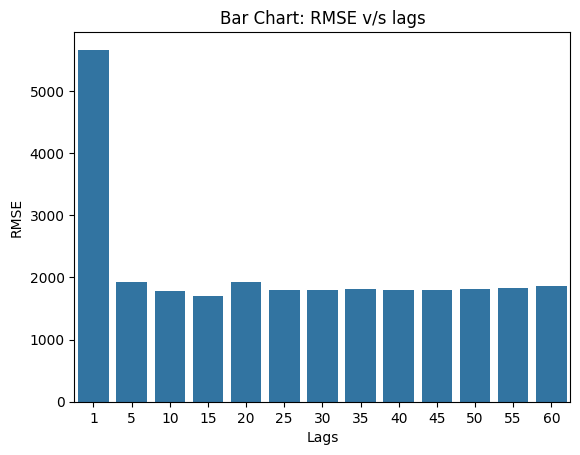

In [49]:
sns.barplot(x=lags,y=rmse_list)
plt.title('Bar Chart: RMSE v/s lags')
plt.xlabel('Lags')
plt.ylabel('RMSE')
plt.show()

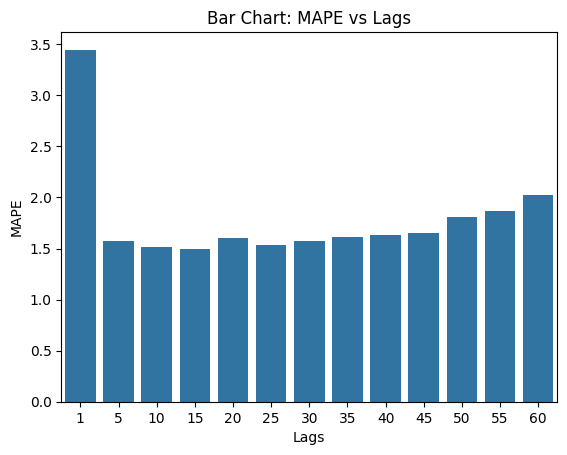

In [50]:
sns.barplot(x=lags,y=mape_list)
plt.title('Bar Chart: MAPE vs Lags')
plt.xlabel('Lags')
plt.ylabel('MAPE')
plt.show()

In [59]:
# Heuristic value for the optimal number of lags up to the condition on auto-
# correlation such that abs(AutoCorrelation) > 2/sqrt(T ), where T is the number of
# observations in training data.

heuristic_threshold = float(2/math.sqrt(train_size))
lag = 1
autoCorr = 1
train = train.copy()
while(autoCorr > heuristic_threshold):
    new_df = add_lag_features(train,lag,['new_cases'])

    corr = abs(new_df['new_cases'].corr(new_df[f'Lag_{lag}']))
    autoCorr = corr
    lag += 1
lag-=1
print("Optimal Number of Lags:", lag)

Optimal Number of Lags: 78


In [60]:
regressor = AR(train['new_cases'],lags=lag).fit()
coef = regressor.params

previous_data = list(train['new_cases'].values)
predictions = []
for ex in range(len(test)):
    lag_values = previous_data[-lag:]
    lag_values.reverse()
    y_test_pred = coef.iloc[0] + sum(coef.iloc[i+1]*lag_values[i] for i in range(lag))

    predictions.append(y_test_pred)
    previous_data.append(test['new_cases'].iloc[ex])

test['predicted'] = predictions
rmse_test = math.sqrt(mean_squared_error(test['new_cases'],test['predicted']))
new_test = test[test['new_cases'] != 0]
mape_test = mean_absolute_percentage_error(test_new['new_cases'],test_new['predicted'])*100
print(f'RMSE : {rmse_test}\nMAPE : {mape_test}')

RMSE : 1863.8570131829865
MAPE : 2.021643125809627
